In [1]:
from itertools import islice

import jax
import jax.numpy as jnp
import numpy as np
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('..')

from models.autoencoder import AutoEncoderModel

In [3]:
epochs = 28
report_every = 3
batch_size = 64
lr = 1e-3
embedding_dim = 16


# Download the MNIST dataset to root
root = '/mnt/disks/persist/torchvision/datasets'
train_dataset = MNIST(root, train=True, download=True, transform=np.array)
test_dataset = MNIST(root, train=False, download=True, transform=np.array)


key_init = jax.random.PRNGKey(42)
specimen = jnp.empty((28, 28, 1))
ckpt_dir = 'ckpts'

# Initialize an autoencoder with random weights, train it on MNIST, and save the weights to ckpt_dir
ae = AutoEncoderModel(key_init, embedding_dim, lr, specimen)
ae.fit(epochs, batch_size, report_every, train_dataset, ckpt_dir)

# Alternatively, load pre-trained weights from ckpt_dir and skip training
# ae = AutoEncoderModel(key_init, embedding_dim, lr, specimen, ckpt_dir)

Epoch 0: train loss 2747899.75
Epoch 3: train loss 598704.875
Epoch 6: train loss 515288.53125
Epoch 9: train loss 474353.53125
Epoch 12: train loss 450508.375
Epoch 15: train loss 434755.9375
Epoch 18: train loss 422564.3125
Epoch 21: train loss 412769.40625
Epoch 24: train loss 405167.53125
Epoch 27: train loss 398908.0625


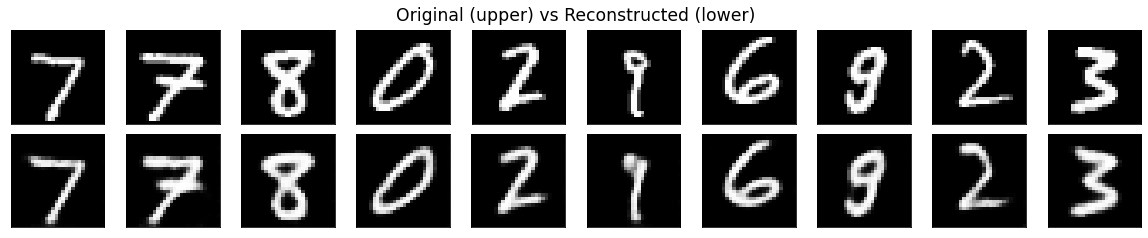

In [4]:
fig, axes = plt.subplots(2, 10, constrained_layout=True, figsize=plt.figaspect(0.2))
test_loader = DataLoader(test_dataset, batch_size)
for i, (X, _) in enumerate(islice(test_loader, 10)):
    image = jnp.array(X).reshape((-1, *specimen.shape))/255.
    _, reconstructed = ae(image)
    ax_orig, ax_reco = axes[0, i], axes[1, i]
    ax_orig.imshow(image[0], cmap='gist_gray')
    ax_reco.imshow(reconstructed[0], cmap='gist_gray')
    for j in range(2):
        axes[j, i].get_xaxis().set_visible(False)
        axes[j, i].get_yaxis().set_visible(False)

        
plt.suptitle('Original (upper) vs Reconstructed (lower)', fontsize='xx-large')
plt.savefig(f'plots/reconstructed_{embedding_dim}.png', dpi=200)
plt.show()